# 4. ÁRBOLES DE DECISIÓN

Un árbol de decisión es un modelo predictivo que se utiliza tanto **para clasificación como para regresión**. Se construye dividiendo recursivamente el conjunto de datos en función de las características de los datos.

Cada nodo interno representa una característica, cada rama una condición sobre esa característica y cada nodo terminal (hoja) representa la clase o el valor predicho.

Los árboles de decisión se construyen mediante una serie de cortes o divisiones del conjunto de datos en subconjuntos más pequeños. Estas divisiones se realizan de manera iterativa utilizando un atributo específico y un criterio de división.

| Característica                       | Árbol de Clasificación                                           | Árbol de Regresión                                                              |
| ------------------------------------ | ---------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| Nombre del Modelo en Scikit-Learn    | DecisionTreeClassifier                                           | DecisionTreeRegressor                                                           |
| Tipo de Variable Objetivo            | Discreta (categorías o clases)                                   | Continua (números reales)                                                       |
| Criterios de División                | gini (Índice de Gini)                                            | mse (Error cuadrático medio)                                                    |
|                                      | entropy (Entropía de Shannon)                                    | friedman_mse (MSE modificado para minimizar varianza)                           |
|                                      | log_loss (Pérdida logarítmica para clasificación probabilística) | mae (Error absoluto medio, más robusto a valores atípicos)                      |
| Función de Poda (Evitar Sobreajuste) | max_depth, min_samples_split, min_samples_leaf, ccp_alpha        | max_depth, min_samples_split, min_samples_leaf, ccp_alpha                       |
| Valor en las Hojas                   | Clase mayoritaria o probabilidades de cada clase                 | Valor medio de la variable objetivo en la hoja                                  |
| Métricas de Evaluación               | accuracy, precision, recall, f1-score                            | mean_squared_error (MSE), mean_absolute_error (MAE), R² score                   |
| Salida de predict()                  | Clase o probabilidades (predict_proba())                         | Valor numérico (estimación continua)                                            |
| Ejemplo de Aplicación                | Clasificación de imágenes, detección de spam, diagnóstico médico | Predicción de precios de casas, estimación de temperatura, predicción de ventas |

### Árbol de regresión para clasificación

Accuracy: 100.00%


[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'

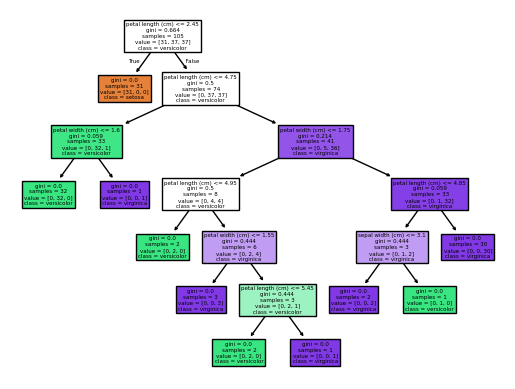

In [5]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data  # Características
y = data.target  # Etiquetas

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
tree.plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names) # La función plot_tree nos permite visualizar el árbol de decisión para ver cómo el modelo toma decisiones en función de las características. filled=True colorea los nodos para distinguir mejor las clases, feature_names asigna nombres a las características, class_name asigna nombres a las clases.

- **Atributo y valor**:
    - Atributo: Es la característica o variable que se utiliza para dividir los datos en ese nodo. Por ejemplo, en un conjunto de datos con características como "edad", "salario", "altura", etc., el atributo podría ser "edad".
    - Valor: Es el valor de la característica en ese punto del árbol que se está utilizando para dividir los datos. Por ejemplo, si el atributo es "edad", el valor podría ser "mayor a 30" o "menor o igual a 30".
- **Gini (criterio de división predeterminado)**:
    - El índice de Gini es una medida de pureza o impureza del nodo. Va de 0 (perfecta pureza, es decir, todos los ejemplos del nodo pertenecen a la misma clase) a 1 (máxima impureza, es decir, los ejemplos están igualmente distribuidos entre todas las clases posibles). Un valor de Gini bajo significa que los datos en el nodo son relativamente homogéneos, mientras que un valor alto significa que hay una mezcla de clases en ese nodo.
    - Cuando estás interesado en maximizar la información obtenida de cada división puedes utilizar La Entropía (Information Gain). Más "inteligente", pero más lento. Útil cuando queremos obtener la mejor división posible, aunque es más costoso a nivel computacional.
- **Samples**:
    - Este valor indica cuántos ejemplos (muestras) llegaron a ese nodo. Es el número total de registros que están siendo evaluados por el árbol en ese nodo específico.
    - Por ejemplo, si un nodo tiene 100 muestras, eso significa que el árbol de decisión está evaluando 100 puntos de datos en ese nodo.
- **Value**:
    - **Value** se refiere a la distribución de las clases en ese nodo. Muestra cuántos ejemplos pertenecen a cada clase en ese nodo.
    - Por ejemplo, si en un nodo hay 80 muestras de la clase 0 y 20 muestras de la clase 1, el valor sería `[80, 20]`. En un nodo de clasificación binaria, los números representan la cantidad de ejemplos de cada clase.
- **Class**:
    - Este es el valor de la clase predicha por el árbol para ese nodo. Si el árbol se está utilizando para clasificación, este valor será la clase con la mayor cantidad de ejemplos en ese nodo.
    - Por ejemplo, si en un nodo la clase 0 tiene más ejemplos que la clase 1, entonces la clase predicha en ese nodo será la clase 0.

Vamos a ver el mismo ejemplo con el criterio de división de Entropía

Accuracy: 97.78%


[Text(0.3333333333333333, 0.9375, 'petal length (cm) <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.2777777777777778, 0.875, 'True  '),
 Text(0.4444444444444444, 0.8125, 'petal length (cm) <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.38888888888888884, 0.875, '  False'),
 Text(0.2222222222222222, 0.6875, 'petal width (cm) <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6666666666666666, 0.6875, 'petal length (cm) <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'),
 Text(0.5555555555555556, 0.5625, 'petal width (cm) <= 1.75\n

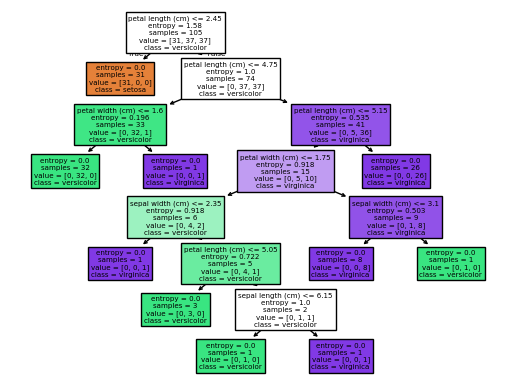

In [6]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data  # Características
y = data.target  # Etiquetas

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42, criterion='entropy')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualizar el árbol de decisión
tree.plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)

Si las clases están equilibradas, la entropía máxima será la siguientes dependiendo del número de clases:
| Número de Clases | Entropía Máxima (log₂) |
| ---------------- | ---------------------- |
| 1                | 0                      |
| 2                | 1                      |
| 3                | 1.585                  |
| 4                | 2                      |
| 5                | 2.322                  |
| 6                | 2.585                  |
| 7                | 2.807                  |
| 8                | 3                      |
| 9                | 3.170                  |
| 10               | 3.322                  |

### ¿Qué hiperparámetros podemos ajustar?

| Parámetro         | Descripción                                                                                                                                                                   | Ajuste                                                                                                                           | Criterio                                                                                            | Valor Predeterminado |
| ----------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- | -------------------- |
| max_depth         | Limita la profundidad máxima del árbol. Controla cuántos niveles de nodos se permiten.                                                                                        | Si es muy profundo, puede sobreajustarse. Si es muy superficial, puede subajustarse.                                             | Busca un valor que maximice la precisión en los datos de validación y minimice el sobreajuste.      | None                 |
| min_samples_split | Especifica el número mínimo de muestras necesarias para dividir un nodo.                                                                                                      | Aumentar este valor hace que el árbol sea más general. Disminuirlo permite divisiones más finas.                                 | Ajusta este parámetro para encontrar un equilibrio entre precisión y generalización.                | 2                    |
| min_samples_leaf  | Especifica el número mínimo de muestras que debe tener cada hoja.                                                                                                             | Si es demasiado pequeño, el modelo se sobreajustará. Si es demasiado grande, puede hacer que el árbol sea demasiado simple.      | Ajustar para evitar la creación de hojas con pocos datos, especialmente en clases pequeñas.         | 1                    |
| max_features      | El número máximo de características que se consideran para dividir un nodo. Puede ser un número entero, una fracción o una de las opciones predefinidas como "sqrt" o "log2". | Limitar el número de características puede hacer que el modelo sea más robusto. Pero también puede hacer que pierda precisión.   | Para clasificación, usa "sqrt". Para regresión, usa "log2".                                         | None                 |
| max_leaf_nodes    | El número máximo de hojas que puede tener el árbol. Limitar las hojas puede reducir la complejidad del modelo.                                                                | Limitar las hojas puede mejorar la generalización y evitar que el árbol crezca innecesariamente.                                 | Establece un número que equilibre la precisión y el número de hojas.                                | None                 |
| splitter          | El método que se usará para dividir los nodos: "best" (mejor división) o "random" (división aleatoria).                                                                       | Si usas un solo árbol, "best" generalmente es mejor. Si usas un modelo de Random Forest o algo similar, "random" puede ser útil. | Si no es un Random Forest, generalmente es mejor "best".                                            | "best"               |
| class_weight      | Permite dar pesos diferentes a las clases en el caso de un desequilibrio de clases.                                                                                           | Úsalo cuando tengas un desequilibrio de clases.                                                                                  | Ajusta los pesos para equilibrar las clases. Si tienes un desequilibrio importante, usa "balanced". | None                 |
| random_state      | Controla la aleatoriedad en la creación del árbol, asegurando que los resultados sean reproducibles.                                                                          | Si deseas que los resultados sean siempre los mismos para comparaciones, usa un valor fijo para random_state.                    | Úsalo si necesitas reproducir los mismos resultados en cada ejecución.                              | None                 |

### ¿Cómo ajustar parámetros?

In [12]:
from sklearn.model_selection import GridSearchCV

# Cargar el dataset Iris
data = load_iris()
X = data.data
y = data.target

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Definir el grid de parámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo con los parámetros especificados
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy en el conjunto de prueba: 1.0000
